In [2]:
import cv2 
import os 
import random 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
pip install tensorflow

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, Dense, MaxPooling2D, Input, Flatten
import tensorflow as tf

In [12]:
POS_PATH = os.path.join('data', 'positive')
NEG = os.path.join('data', 'negative')
ANC = os.path.join('data', 'anchor')

In [13]:
print(POS_PATH)
print(NEG)
print(ANC)


data\positive
data\negative
data\anchor


In [9]:
os.makedirs(POS_PATH)
os.makedirs(NEG)
os.makedirs(ANC)

In [10]:
!tar -xf lfw.tgz

In [12]:


for directory in os.listdir('lfw'):
    dir_path = os.path.join('lfw', directory)  
    if os.path.isdir(dir_path):  
        for file in os.listdir(dir_path):  
            EX_PATH = os.path.join(dir_path, file)  
            NEW_PATH = os.path.join(NEG, file)  
            os.replace(EX_PATH, NEW_PATH) 


In [4]:
import uuid 

In [8]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    frame=frame[120:120+250, 200:200+250, :]
    
    
    if cv2.waitKey(1) & 0XFF ==ord('a'):
        imgname=os.path.join(ANC, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
        
        
    
    if cv2.waitKey(1) & 0XFF ==ord('p'):
        imgname=os.path.join(POS_PATH, '{}.jpg'.format(uuid.uuid1()))
        cv2.imwrite(imgname, frame)
    
    
    cv2.imshow('Image Collection', frame)
    
    if cv2.waitKey(1) & 0XFF ==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

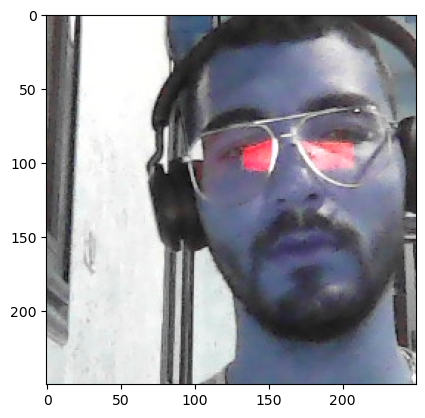

In [9]:
plt.imshow(frame)

In [10]:
frame.shape

(250, 250, 3)

In [14]:
anchor = tf.data.Dataset.list_files(ANC+'\*.jpg').take(300)
positive = tf.data.Dataset.list_files(POS_PATH+'\*.jpg').take(300)
negative = tf.data.Dataset.list_files(NEG+'\*.jpg').take(300)

In [15]:
dir_test = anchor.as_numpy_iterator()

In [29]:
print(dir_test.next())

b'data\\anchor\\60c79c95-78e4-11ef-99db-fa54f6c0c47a.jpg'


In [30]:
def preprocess(file_path):
     byte_img = tf.io.read_file(file_path)
     img= tf.io.decode_jpeg(byte_img)
     img=tf.image.resize(img, (100,100))
     img=img/ 255.0
     return img
    

In [31]:
img = preprocess('data\\anchor\\96c599d7-78e4-11ef-9155-fa54f6c0c47a.jpg')

In [32]:
img

<tf.Tensor: shape=(100, 100, 3), dtype=float32, numpy=
array([[[0.6431373 , 0.6431373 , 0.6431373 ],
        [0.6431373 , 0.6431373 , 0.6431373 ],
        [0.64240193, 0.64240193, 0.64240193],
        ...,
        [0.6362745 , 0.6362745 , 0.6362745 ],
        [0.64215684, 0.64215684, 0.64215684],
        [0.64117646, 0.64117646, 0.64117646]],

       [[0.6401961 , 0.6401961 , 0.6401961 ],
        [0.64093137, 0.64093137, 0.64093137],
        [0.6431373 , 0.6431373 , 0.6431373 ],
        ...,
        [0.6360294 , 0.6360294 , 0.6360294 ],
        [0.6382353 , 0.6382353 , 0.6382353 ],
        [0.6382353 , 0.6382353 , 0.6382353 ]],

       [[0.6392157 , 0.6392157 , 0.6392157 ],
        [0.6401961 , 0.6401961 , 0.6401961 ],
        [0.6431373 , 0.6431373 , 0.6431373 ],
        ...,
        [0.63529414, 0.63529414, 0.63529414],
        [0.63529414, 0.63529414, 0.63529414],
        [0.63529414, 0.63529414, 0.63529414]],

       ...,

       [[0.7127451 , 0.7127451 , 0.7127451 ],
        [0.71

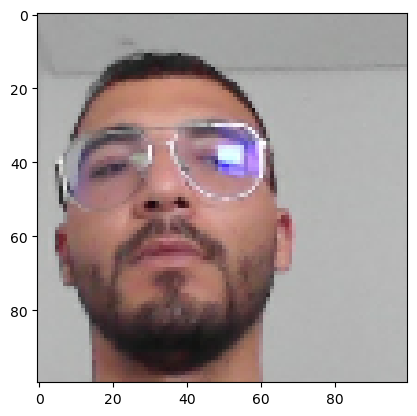

In [33]:
plt.imshow(img)

In [34]:
positive = tf.data.Dataset.zip((anchor, positive, tf.data.Dataset.from_tensor_slices(tf.ones(len(anchor)))))
negative = tf.data.Dataset.zip((anchor, negative, tf.data.Dataset.from_tensor_slices(tf.zeros(len(anchor)))))
data = positive.concatenate(negative)

In [35]:
data

<_ConcatenateDataset element_spec=(TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.string, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [37]:
tf.zeros(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0

In [38]:
tf.ones(len(anchor))

<tf.Tensor: shape=(300,), dtype=float32, numpy=
array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1

In [39]:
samples = data.as_numpy_iterator()

In [40]:
exemple = samples.next()

In [41]:
exemple

(b'data\\anchor\\7a4b83bd-78e4-11ef-abaf-fa54f6c0c47a.jpg',
 b'data\\positive\\dfb3bdbf-78e4-11ef-b0c8-fa54f6c0c47a.jpg',
 1.0)

In [42]:
def preprocess_twin (input_img, validation_img, label):
    return (preprocess(input_img), preprocess(validation_img), label)

In [43]:
res = preprocess_twin(*exemple)

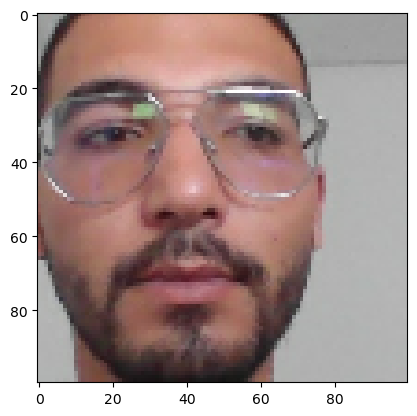

In [44]:
plt.imshow(res[1])

In [45]:
data = data.map(preprocess_twin)
data = data.cache()
data = data.shuffle(buffer_size=1024)

In [46]:
data

<_ShuffleDataset element_spec=(TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(100, 100, None), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.float32, name=None))>

In [47]:
sample = data.as_numpy_iterator()

In [52]:
samp = sample.next()

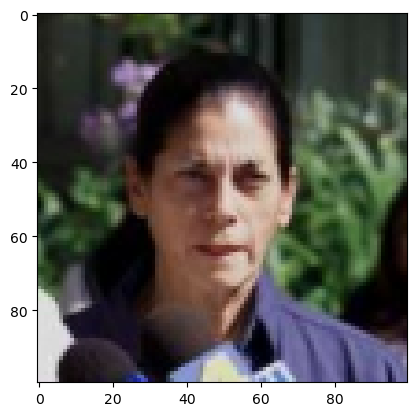

In [53]:
plt.imshow(samp[1])

In [54]:
train_data = data.take(round(len(data)*.7))
train_data = train_data.batch(16)
train_data = train_data.prefetch(8)

In [55]:
train_samples = train_data.as_numpy_iterator()


In [56]:
train_sample = train_samples.next()

In [57]:
len(train_sample[0])

16

In [58]:
round(len(data)*.7)

420

In [59]:
test_data = data.skip(round(len(data)*.7))
test_data =test_data.take(round(len(data)*.3))
test_data = test_data.batch(16)
test_data = test_data.prefetch(8)

In [60]:
 inp = Input(shape=(100,100,3))

In [61]:
inp

<KerasTensor shape=(None, 100, 100, 3), dtype=float32, sparse=False, name=keras_tensor>

In [62]:
c1 = Conv2D(64, (10,10), activation='relu')(inp)

In [63]:
c1

<KerasTensor shape=(None, 91, 91, 64), dtype=float32, sparse=False, name=keras_tensor_1>

In [64]:
 m1=MaxPooling2D(64, (2,2), padding='same')(c1)

In [65]:
m1

<KerasTensor shape=(None, 46, 46, 64), dtype=float32, sparse=False, name=keras_tensor_2>

In [77]:
def make_embedding():
    inp = Input(shape=(100, 100, 3))

    c1 = Conv2D(64, (10, 10), activation='relu')(inp)
    m1 = MaxPooling2D(64, (2, 2), padding='same')(c1)

    c2 = Conv2D(128, (7, 7), activation='relu')(m1)
    m2 = MaxPooling2D(64, (2, 2), padding='same')(c2)

    c3 = Conv2D(128, (4, 4), activation='relu')(m2)
    m3 = MaxPooling2D(64, (2, 2), padding='same')(c3)

    c4 = Conv2D(256, (4, 4), activation='relu')(m3)

    f1 = Flatten()(c4)
    d1 = Dense(4096, activation='sigmoid')(f1)

    return Model(inputs=[inp], outputs=[d1], name='embedding')

In [78]:
model = make_embedding()


In [79]:
model.summary()

Model: "embedding"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 100, 100, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 91, 91, 64)     │        19,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 46, 46, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 40, 40, 128)    │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 17, 17, 128)    │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 6, 6, 256)      │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4096)           │    37,752,832 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 38,960,448 (148.62 MB)

 Trainable params: 38,960,448 (148.62 MB)

 Non-trainable params: 0 (0.00 B)

In [80]:
class L1Dist(Layer):
    def __init__(self, **kwargs):
        super().__init__()

    def call(self, input_embedding, validation_embedding):
        
        return tf.math.abs(input_embedding - validation_embedding)

In [81]:
def make_model():
   
    input_image = Input(name='input_image', shape=(100, 100, 3))
    validation_image = Input(name='validation_image', shape=(100, 100, 3))

   
    siamese_layer = L1Dist()
    siamese_layer._name = 'distance'

   
    distances = siamese_layer(model(input_image)[0], model(validation_image)[0])

   
    classifier = Dense(1, activation='sigmoid')(distances)

    
    return Model(inputs=[input_image, validation_image], outputs=classifier, name='SiameseNetwork')

In [82]:
siamese_model = make_model()

In [83]:
siamese_model.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_image    │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_image[0][0… │
│ (Functional)        │                   │            │ validation_image… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_1 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_1[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [84]:
binary_cross_loss = tf.losses.BinaryCrossentropy()

In [85]:
opt = tf.keras.optimizers.Adam(1e-4)

In [86]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, 'ckpt')
checkpoint = tf.train.Checkpoint(opt = opt, siamese_model=siamese_model )

In [87]:
@tf.function 
def train_step (batch):
    with tf.GradientTape() as tape:
        x = batch[:2]
        y= batch[2]
        
        yhat = siamese_model(x, training = True)
        loss = binary_cross_loss(y, yhat)
    print(loss)
    
    grad = tape.gradient(loss, siamese_model.trainable_variables)
    
    opt.apply_gradients(zip(grad, siamese_model.trainable_variables))
    return loss

In [90]:
def train(data, EPOCHS):
    for epoch in range(1, EPOCHS+1):
        print('\n Epoch {}/{}'.format(epoch, EPOCHS))
        progbar = tf.keras.utils.Progbar(len(data))
        
        for idx, batch in enumerate(train_data):
            train_step(batch)
            progbar.update(idx+1)
            
        if epoch % 10 ==0:
            checkpoint.save(file_prefix = checkpoint_prefix)

In [91]:
EPOCHS = 50

In [92]:
 train(train_data, EPOCHS)


 Epoch 1/50
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
Tensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
26/27 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/stepTensor("binary_crossentropy/truediv:0", shape=(), dtype=float32)
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step

 Epoch 2/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step

 Epoch 3/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step

 Epoch 4/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 39s 1s/step

 Epoch 5/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step

 Epoch 6/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step

 Epoch 7/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step

 Epoch 8/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step

 Epoch 9/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step

 Epoch 10/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step

 Epoch 11/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step

 Epoch 12/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step

 Epoch 13/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 37s 1s/step

 Epoch 14/50
27/27 ━━━━━━━━━━━━━━━━━━━━ 38s 1s/step

 Epoch 15/50
27/27 ━━━━━━━━━━━━━━━

In [94]:
from tensorflow.keras.metrics import Precision, Recall

In [115]:
test_input , test_val, y_true = test_data.as_numpy_iterator().next()

In [116]:
test_var = test_data.as_numpy_iterator().next()

In [117]:
y_hat = siamese_model.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step


In [118]:
y_hat

array([[1.0000000e+00],
       [9.0093664e-08],
       [9.9964154e-01],
       [1.0000000e+00],
       [1.9041925e-08],
       [9.9996924e-01],
       [1.0000000e+00],
       [9.9999440e-01],
       [1.0000000e+00],
       [3.9597459e-09],
       [1.3375577e-06],
       [9.9990821e-01],
       [9.9988294e-01],
       [1.1275382e-06],
       [9.5345509e-09],
       [1.3520523e-06]], dtype=float32)

In [119]:
[1 if prediction > 0.5 else 0 for prediction in y_hat ]

[1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0]

In [120]:
y_true

array([1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.],
      dtype=float32)

In [121]:
matrix = Recall()
matrix.update_state(y_true, y_hat)
matrix.result().numpy()

1.0

In [122]:
matrix = Precision()
matrix.update_state(y_true, y_hat)
matrix.result().numpy()

1.0

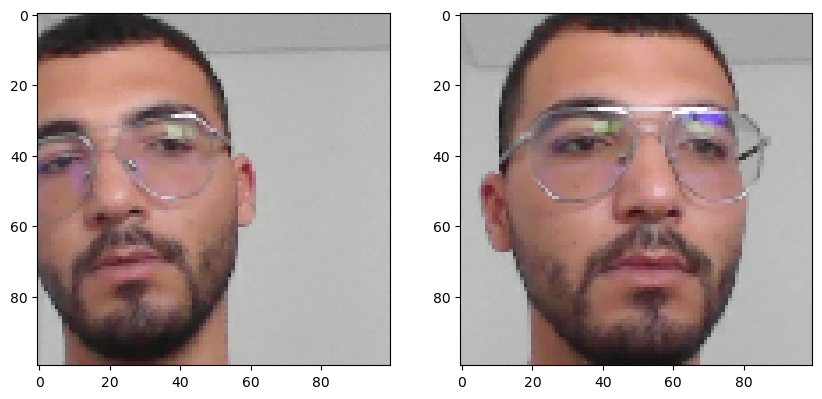

In [129]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(test_input[0])
plt.subplot(1,2,2)
plt.imshow(test_val[0])
plt.show()

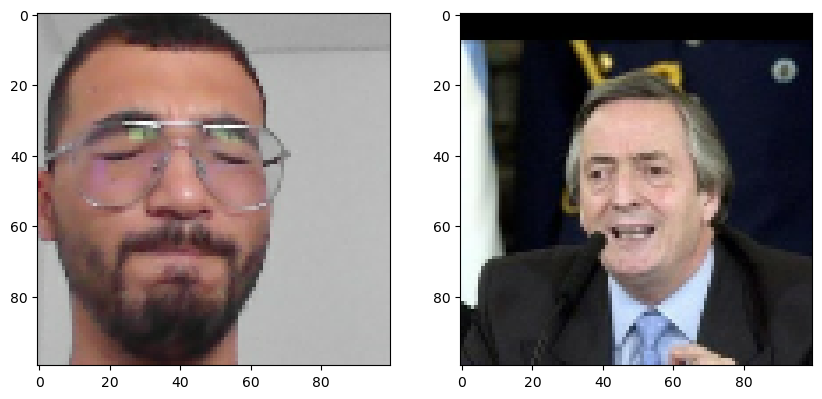

In [128]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(test_input[1])
plt.subplot(1,2,2)
plt.imshow(test_val[1])
plt.show()

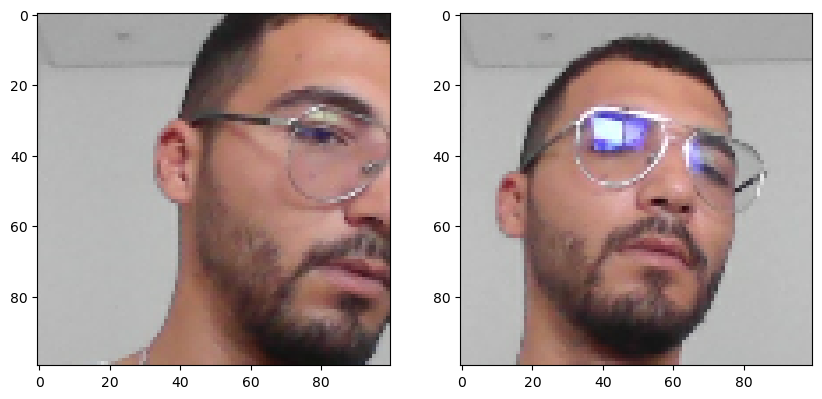

In [127]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.imshow(test_input[3])
plt.subplot(1,2,2)
plt.imshow(test_val[3])
plt.show()

In [130]:
siamese_model.save('Face_Id_Model.h5')

In [131]:
modell = tf.keras.models.load_model('Face_Id_Model.h5', custom_objects={'L1Dist': L1Dist, 'BinaryCrossentropy': tf.losses.BinaryCrossentropy })

In [132]:
modell.predict([test_input, test_val])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step


array([[1.0000000e+00],
       [9.0093664e-08],
       [9.9964154e-01],
       [1.0000000e+00],
       [1.9041925e-08],
       [9.9996924e-01],
       [1.0000000e+00],
       [9.9999440e-01],
       [1.0000000e+00],
       [3.9597459e-09],
       [1.3375577e-06],
       [9.9990821e-01],
       [9.9988294e-01],
       [1.1275382e-06],
       [9.5345509e-09],
       [1.3520523e-06]], dtype=float32)

In [133]:
modell.summary()

Model: "SiameseNetwork"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ validation_image    │ (None, 100, 100,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding           │ (None, 4096)      │ 38,960,448 │ input_image[0][0… │
│ (Functional)        │                   │            │ validation_image… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ l1_dist_2 (L1Dist)  │ (None, 4096)      │          0 │ embedding[0][0],  │
│                     │                   │            │ embedding[1][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 1)         │      4,097 │ l1_dist_2[0][0]   │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 38,964,545 (148.64 MB)

 Trainable params: 38,964,545 (148.64 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
def verify(frame, modell, detection_threshold, verification_threshold):
    results = []

    for image in os.listdir(os.path.join('application_data', 'verification_images')):

        input_img = preprocess(os.path.join('application_data', 'input_image', 'input_image.jpg'))
        validation_img = preprocess(os.path.join('application_data', 'verification_images', image))
        
   
        result = modell.predict(list(np.expand_dims([input_img, validation_img], axis=1)))
        results.append(result)
        
   
    detection = np.sum(np.array(results) > detection_threshold)
    
   
    verification = detection / len(os.listdir(os.path.join('application_data', 'verification_images')))
    
   
    verified = verification > verification_threshold
    
    return results, verified

In [6]:
cap = cv2.VideoCapture(0)

while cap.isOpened():
    
    ret, frame = cap.read()
    
    frame = frame[120:120+250, 200:200+250, :]

 
    cv2.imshow('Verification', frame)
    
    
    if cv2.waitKey(10) & 0xFF == ord('v'):
        
        cv2.imwrite(os.path.join('application_data', 'input_image', 'input_image.jpg'), frame)
        
      
        results, verified = verify(frame, modell, 0.5, 0.5)
        print(verified)
    
   
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break


cap.release()
cv2.destroyAllWindows()

NameError: name 'modell' is not defined

In [7]:
cap.release()
cv2.destroyAllWindows()